In [1]:
from data_utils import load_data,flatten_data
from early_model import stacked_lstm
from model_utils import model_pipeline,plot_history
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_participant_num = ["C93D","C382D","C382N","C544D","C709N","C788N","P113D","P113N","P191D","P191N","P299D","P300D","P336D","P492D","P492N","P531N","P699D","P890N","P921D","P921N"]
valid_participant_num = ["C67D","C202D","C202N","C256D","C256N","P54D","P54N","P342D","P342N","P487D","P487N","P649N"]

In [3]:
X_train, y_train = load_data(train_participant_num, 'train', downsampling=True,angle_energy=False,augment=False)
X_valid, y_valid = load_data(valid_participant_num, 'validation')

In [9]:
print(X_train.shape,np.unique(y_train[:,0],return_counts=True))

print(X_valid.shape,np.unique(y_valid[:,0],return_counts=True))

(4286, 180, 70) (array([0., 1.], dtype=float32), array([ 844, 3442]))
(2869, 180, 70) (array([0., 1.], dtype=float32), array([ 171, 2698]))


/Users/zekunwu/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/50
9/9 [==============================] - 6s 473ms/step - loss: 0.2536 - binary_accuracy: 0.4141 - val_loss: 0.1452 - val_binary_accuracy: 0.7591 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/50
9/9 [==============================] - 4s 466ms/step - loss: 0.1894 - binary_accuracy: 0.5490 - val_loss: 0.1141 - val_binary_accuracy: 0.9373 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/50
9/9 [==============================] - 4s 404ms/step - loss: 0.1692 - binary_accuracy: 0.6433 - val_loss: 0.0968 - val_binary_accuracy: 0.9390 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/50
9/9 [==============================] - 4s 426ms/step - loss: 0.1559 - binary_accuracy: 0.6918 - val_loss: 0.0878 - val_binary_accuracy: 0.9387 - lr: 5.0000e

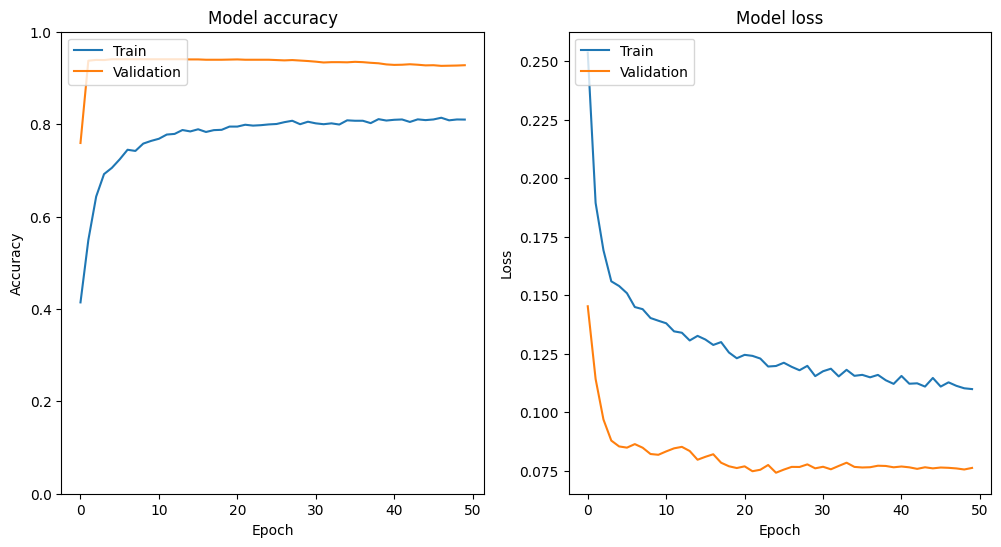

In [10]:
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train.shape[1]
model = stacked_lstm(input_shape,num_classes)
y_pred, y_true, H = model_pipeline(model, X_train, y_train, X_valid, y_valid)
plot_history(H)

In [6]:
X_train_flatten,y_train_flatten = flatten_data(X_train,y_train)
X_valid_flatten,y_valid_flatten = flatten_data(X_valid,y_valid)

In [7]:
print(X_train_flatten.shape,np.unique(y_train_flatten[:],return_counts=True))

print(X_valid_flatten.shape,np.unique(y_valid_flatten[:],return_counts=True))

(4286, 12600) (array([0, 1]), array([3442,  844]))
(2869, 12600) (array([0, 1]), array([2698,  171]))


In [8]:
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

rf.fit(X_train_flatten,y_train_flatten)
ada.fit(X_train_flatten,y_train_flatten)

KeyboardInterrupt: 

In [ ]:
rf_pred = rf.predict(X_valid_flatten)
ada_pred = ada.predict(X_valid_flatten)

In [ ]:
print(classification_report(y_valid_flatten,rf_pred))
print(confusion_matrix(y_valid_flatten,rf_pred))

In [ ]:
print(classification_report(y_valid_flatten,ada_pred))
print(confusion_matrix(y_valid_flatten,ada_pred))